---
# FACEBOOK PROPHET AND CHANGEPOINTS
---

## Topics to be Covered:

- Use-Case Intro
  - Import Libraries
  - Import Data

- Changepoints
  -  Types of changepoints
  -  How can we detect changepoints?


- Facebook Prophet
  - Prophet Implementation
    - Summary of dataset
    - Visualize the data
    - Time Series Forecasting with Prophet
    - Plotting the forecasted components
    - Adding changepoints to Prophet
    - Adjusting Trend

# Use-Case Intro


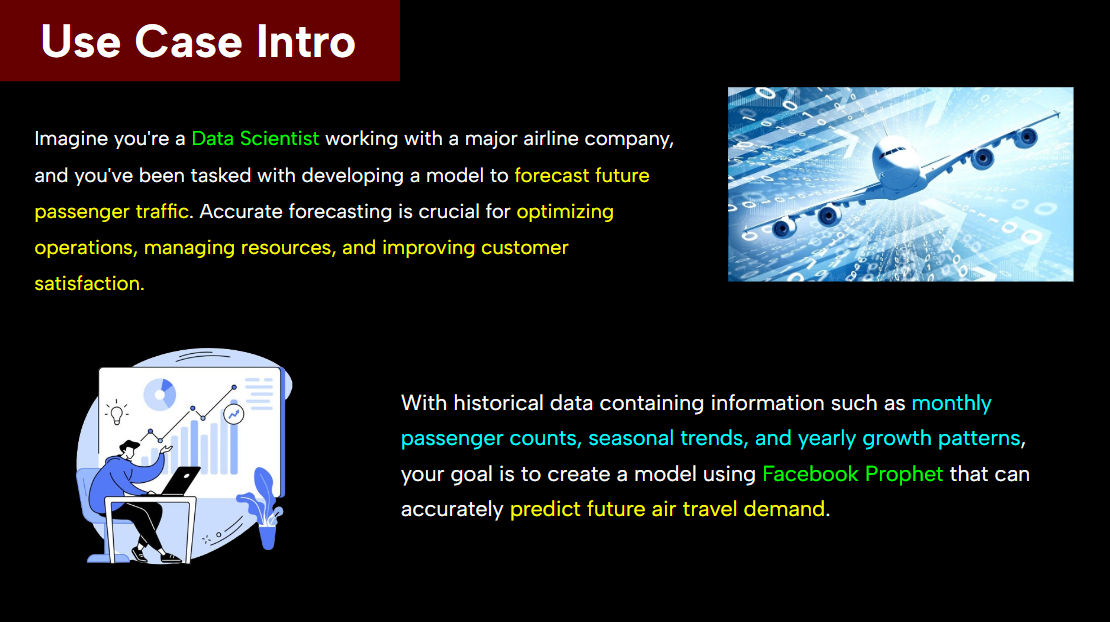

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

For using prophet we need to install pystan as well which is an interface.

**Instructor Note**:
> - This installation will take around 5-6 mins, so better to do it earlier.

In [ ]:
!pip install prophet
!pip install pystan~=2.14
!pip install -U gdown

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975135 sha256=f56afb0c10942a717bb267242c000c6702f8cf762a31a078bb8778fb93e534c0
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')

In [ ]:
import logging

# Set the logging level to WARNING to suppress INFO and DEBUG messages
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


## Import Data


The dataset we're using can be found [here](https://www.kaggle.com/datasets/chirag19/air-passengers).

In [ ]:
!gdown 1RmPMuYqBQpc3EpFQ0o21f6syRV1kzYnI


Downloading...
From: https://drive.google.com/uc?id=1RmPMuYqBQpc3EpFQ0o21f6syRV1kzYnI
To: /content/AirPassengers.csv
100% 1.75k/1.75k [00:00<00:00, 5.15MB/s]


In [ ]:
df = pd.read_csv("/content/AirPassengers.csv")
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
df.rename(columns = {'#Passengers':'AirPassengers'}, inplace = True)

# Changepoints

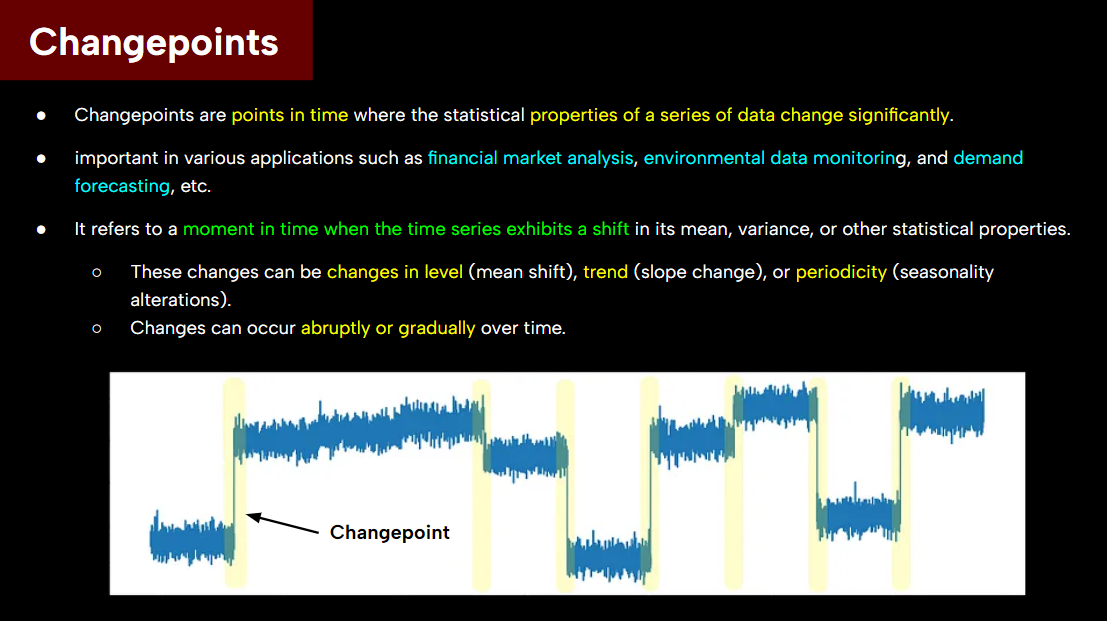

## Types of changepoints

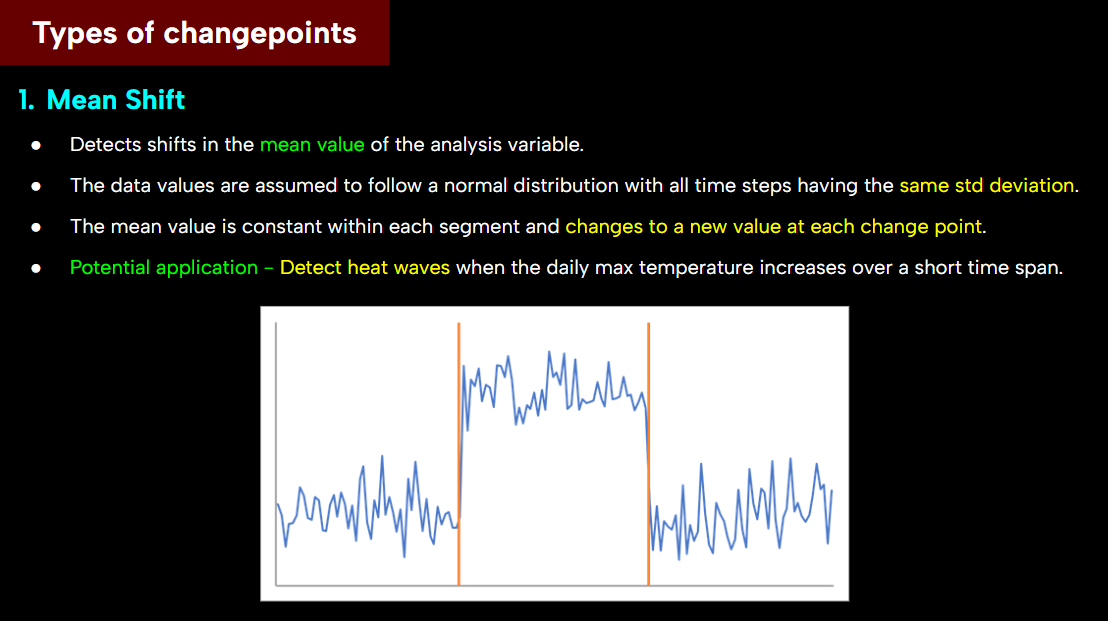

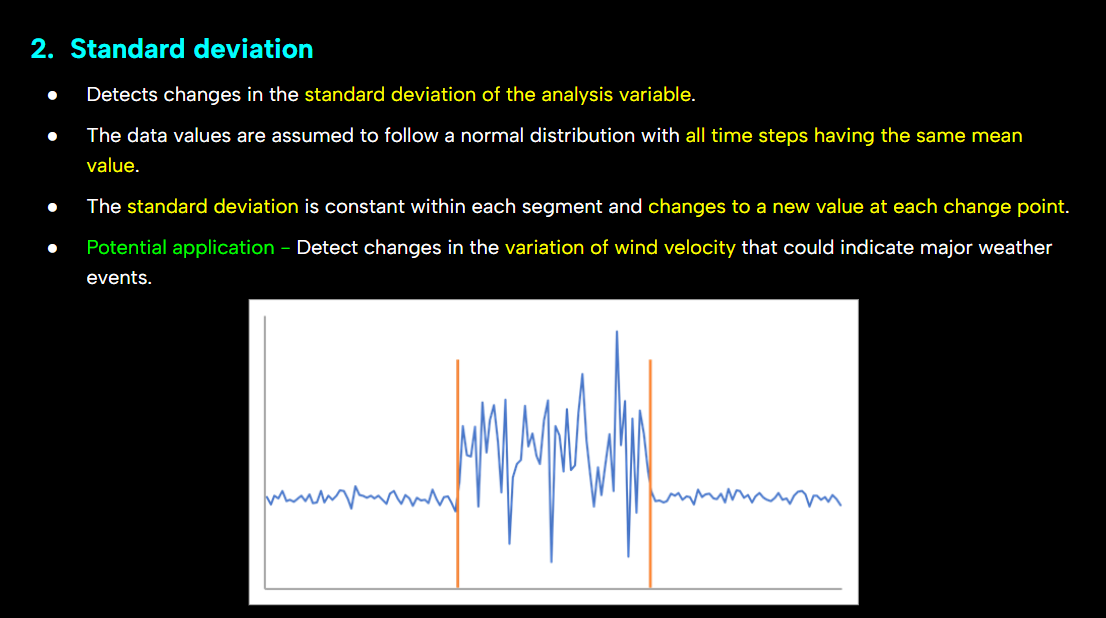

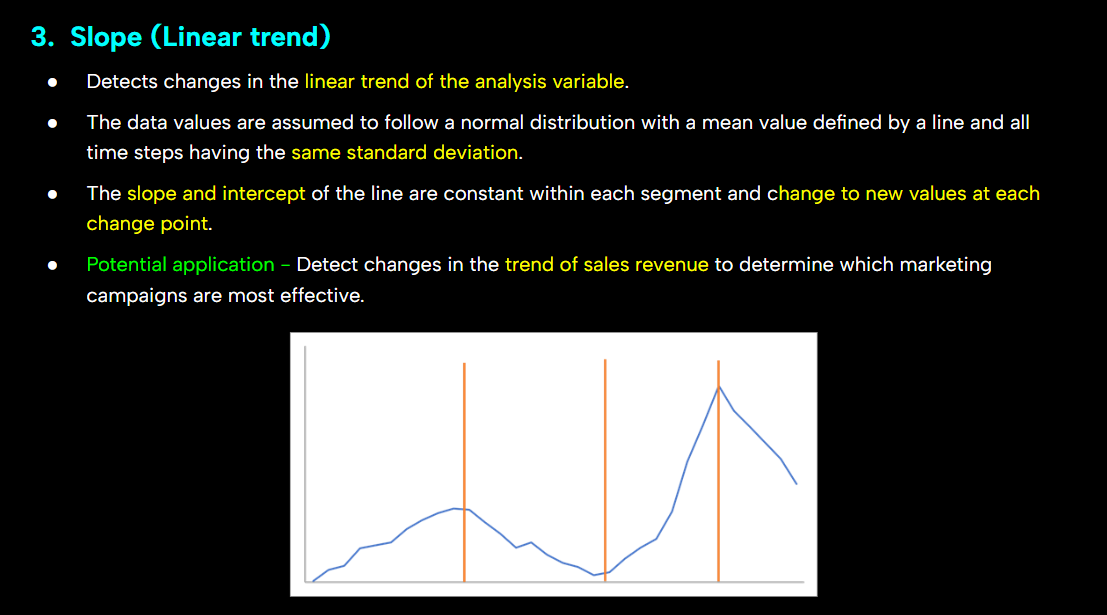

### How can we detect changepoints?

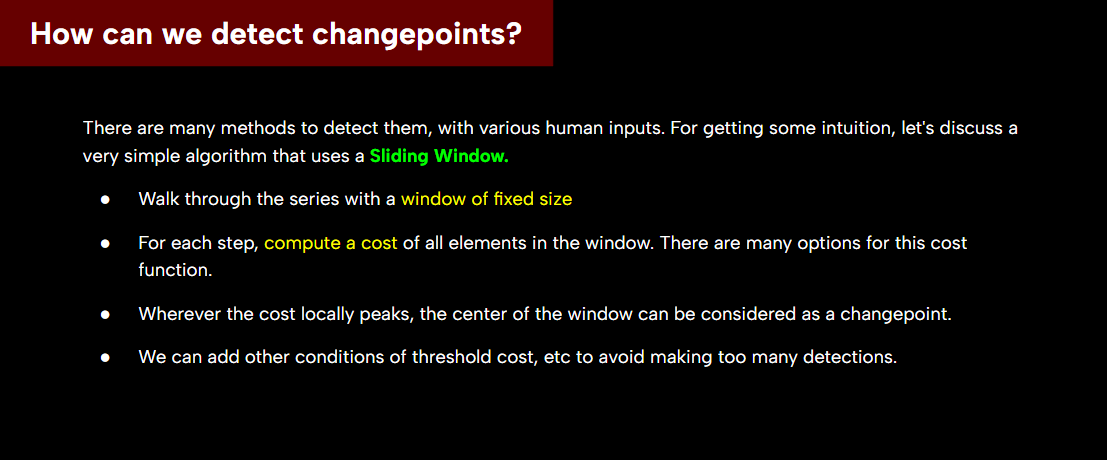

<br>

Some other ways to detect changepoints:

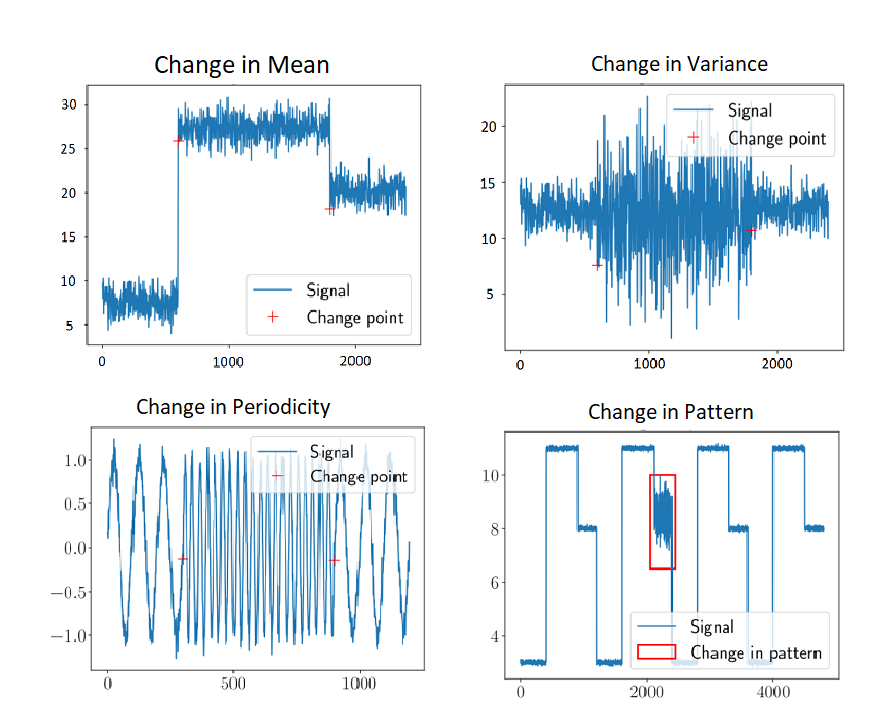

# Facebook Prophet

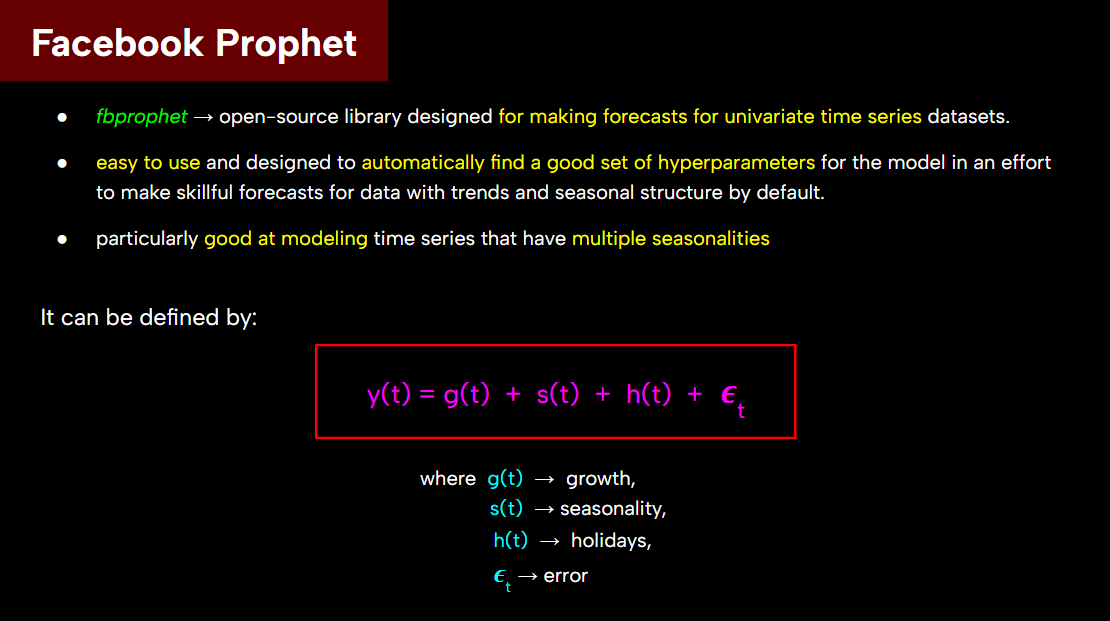

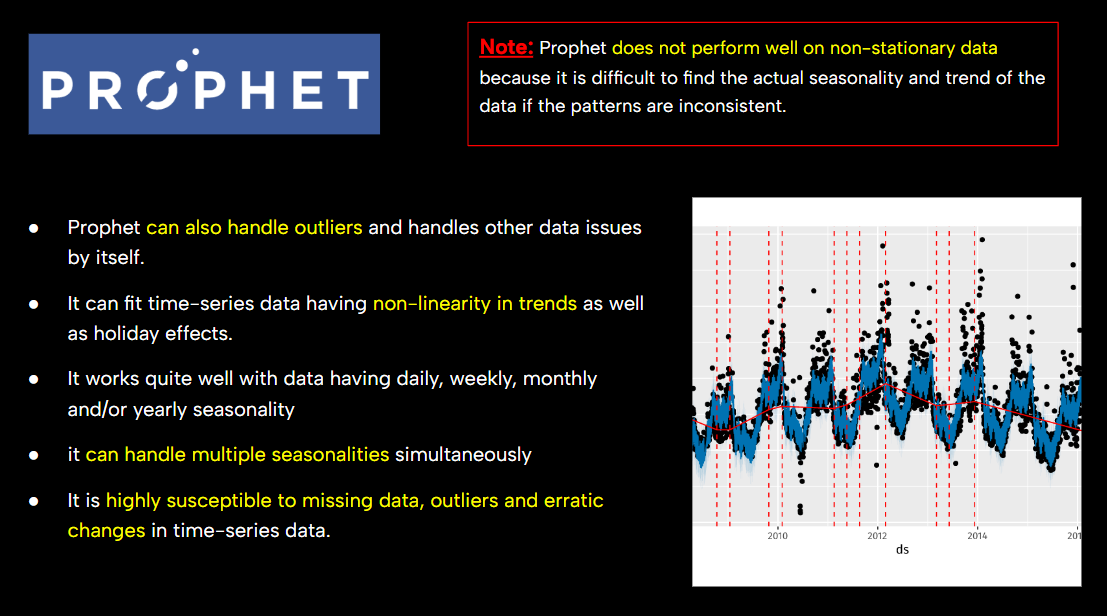

## Prophet Implementation

### Summary of dataset
Now, we will print the information about the dataset that will tell us about the columns, data type of the columns and whether the column is null or not null.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


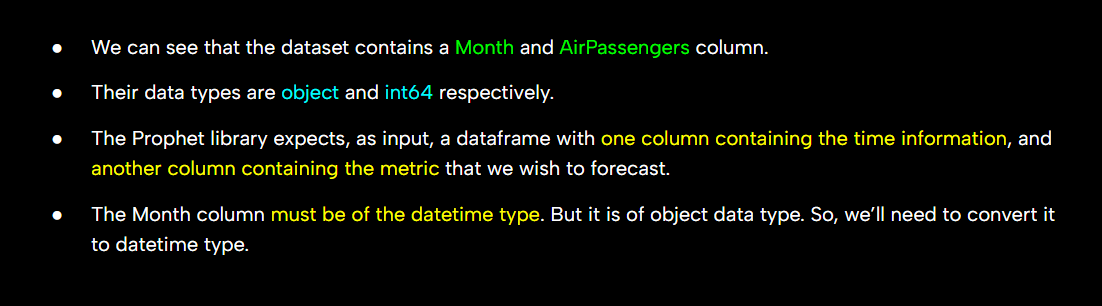

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

Now our Month column is of the correct datetime type.

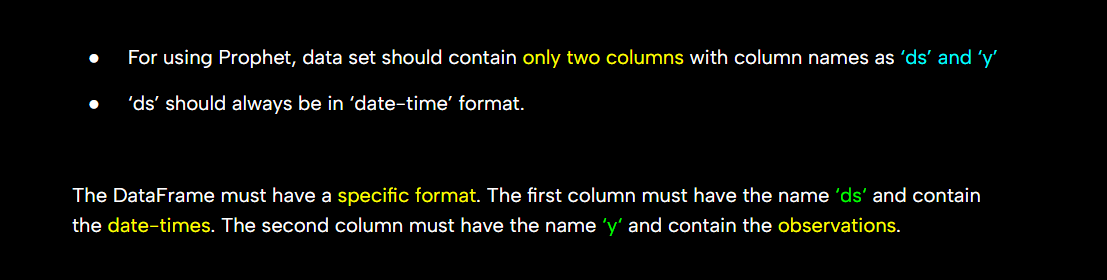

In [ ]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121

### Visualize the data

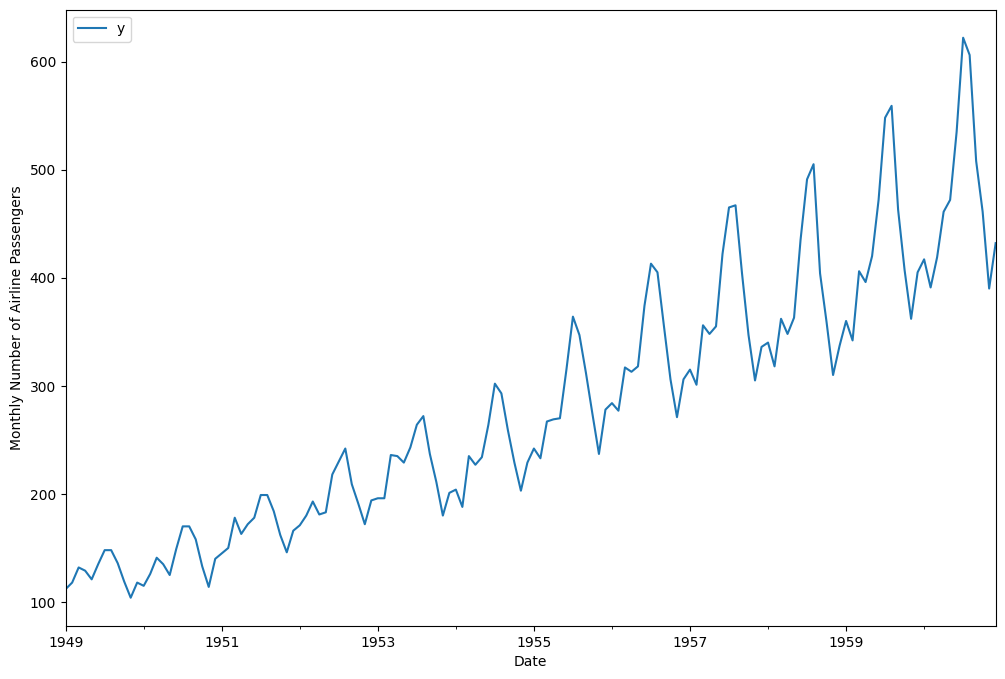

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

### Time Series Forecasting with Prophet

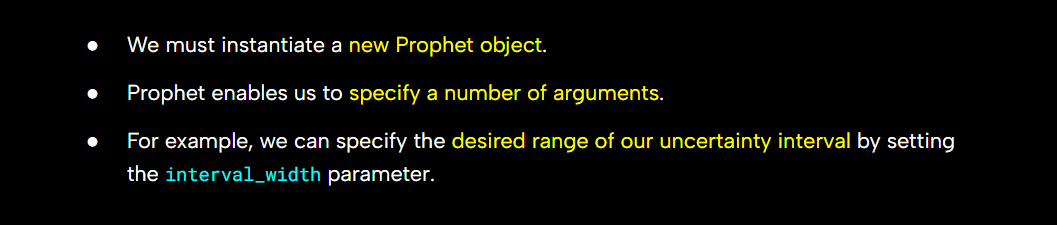

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/zqrswxf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/5jqc5iqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81421', 'data', 'file=/tmp/tmpwnane455/zqrswxf8.json', 'init=/tmp/tmpwnane455/5jqc5iqd.json', 'output', 'file=/tmp/tmpwnane455/prophet_modelcfjjan_k/prophet_model-20240308155930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


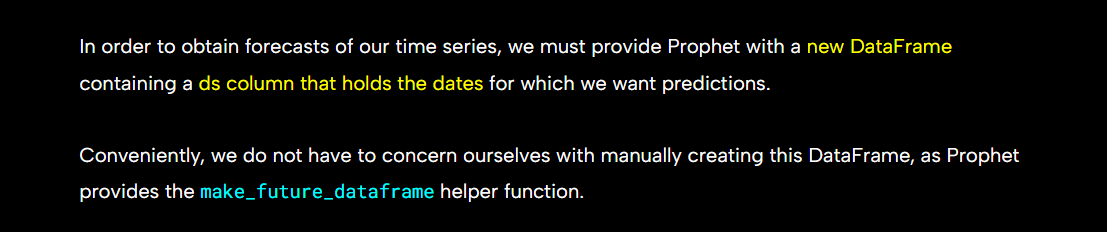

In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()


ds
0 1949-01-01
1 1949-02-01
2 1949-03-01
3 1949-04-01
4 1949-05-01

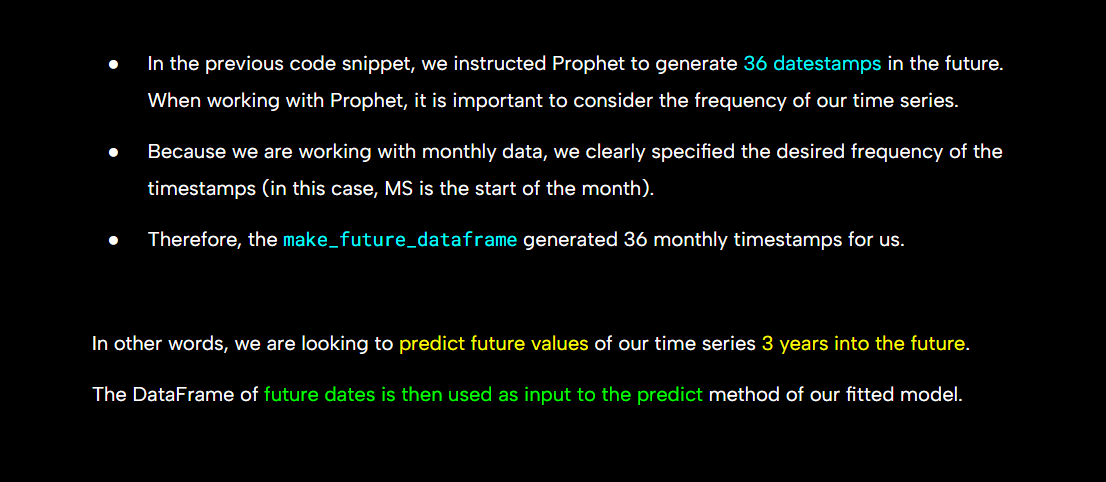

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   86.018883   43.128584  128.219310
1 1949-02-01   79.495226   35.305906  121.520597
2 1949-03-01  111.025581   68.276912  157.265233
3 1949-04-01  108.719017   65.058477  152.231764
4 1949-05-01  112.095281   68.021650  153.463076

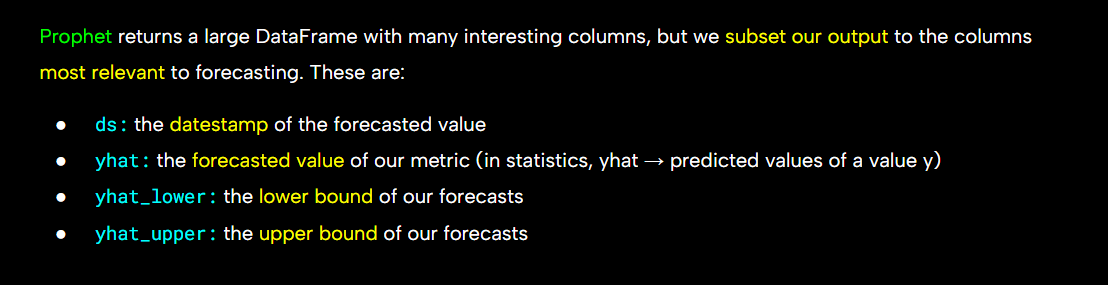

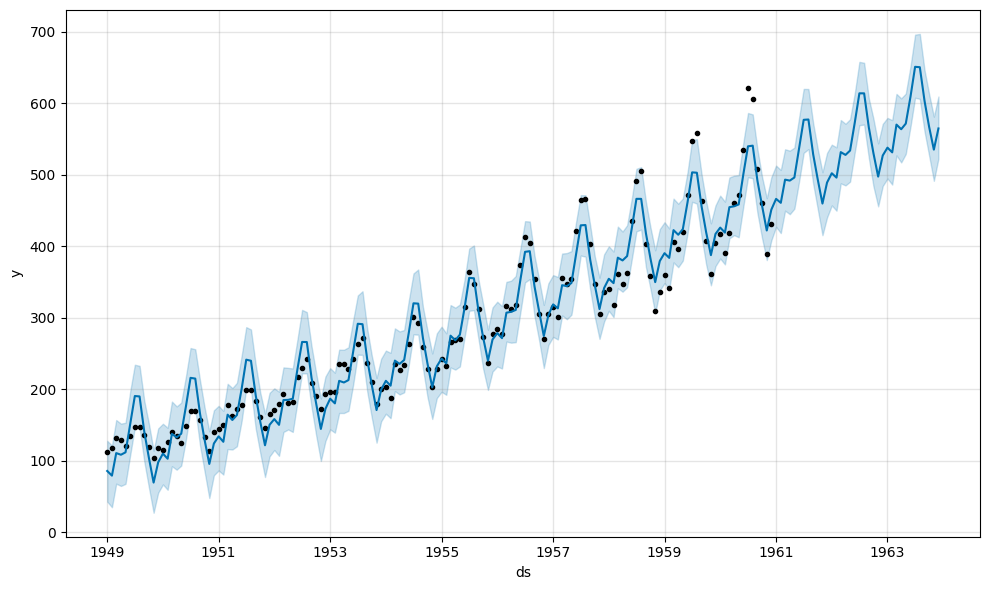

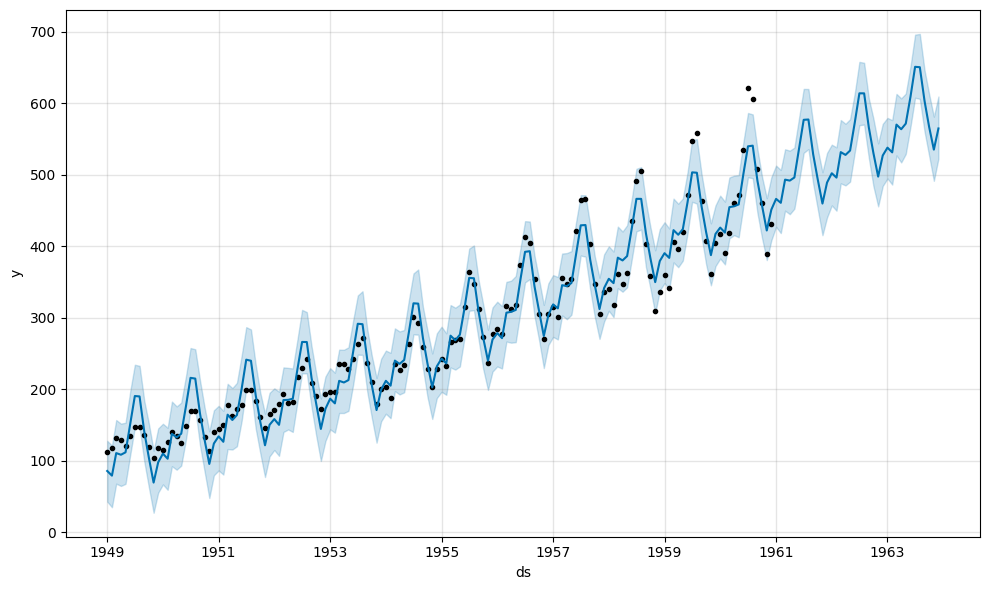

In [ ]:
my_model.plot(forecast, uncertainty=True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).
One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

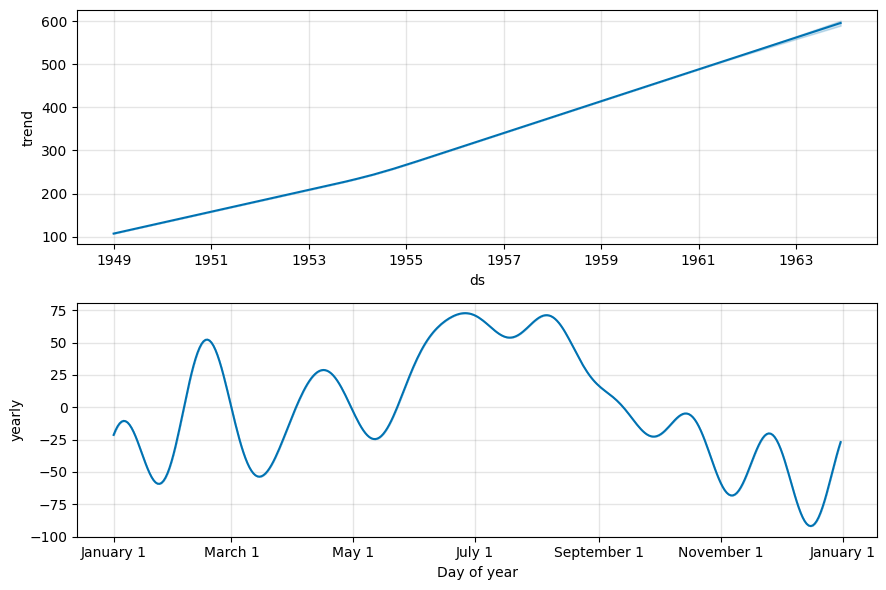

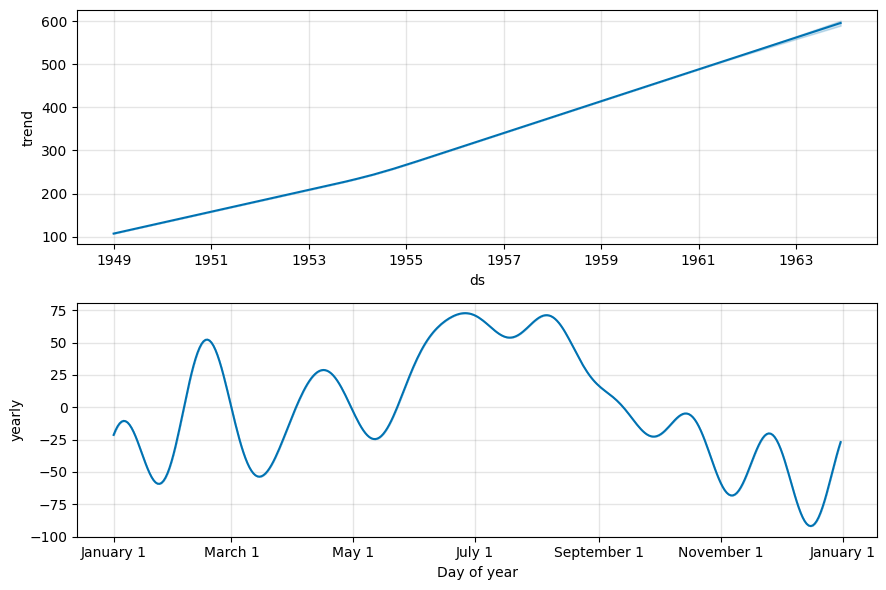

In [ ]:
my_model.plot_components(forecast)

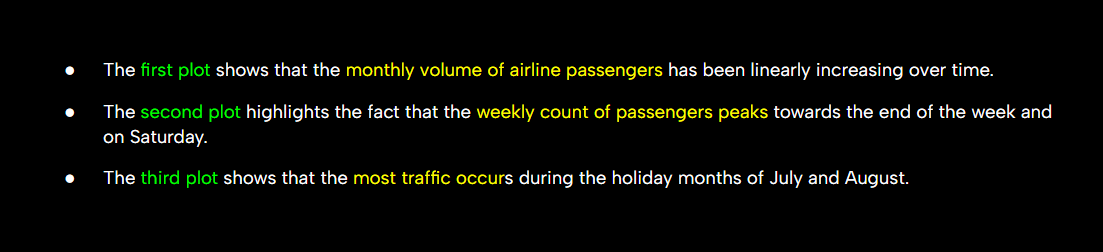

### Plotting the forecasted components

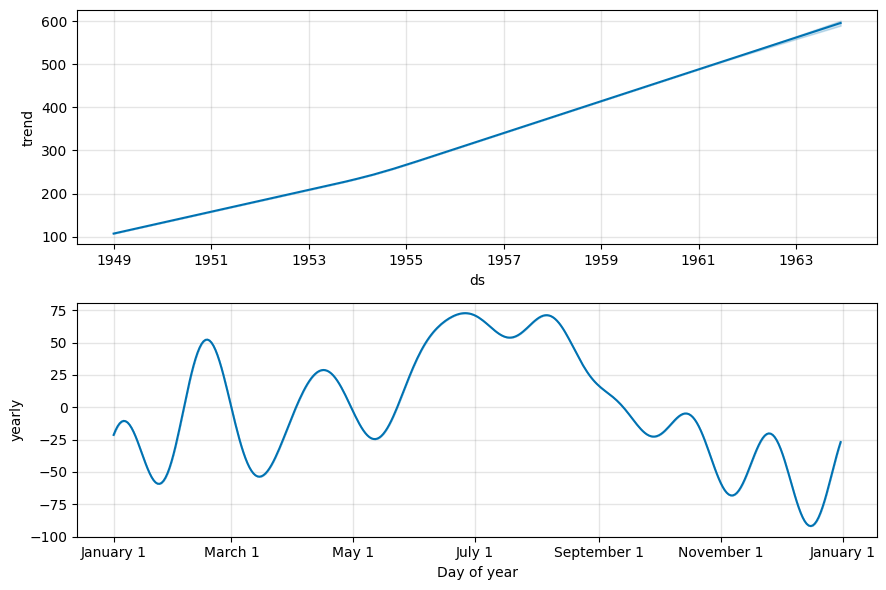

In [ ]:
fig1 = my_model.plot_components(forecast)

### Adding ChangePoints to Prophet

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred.

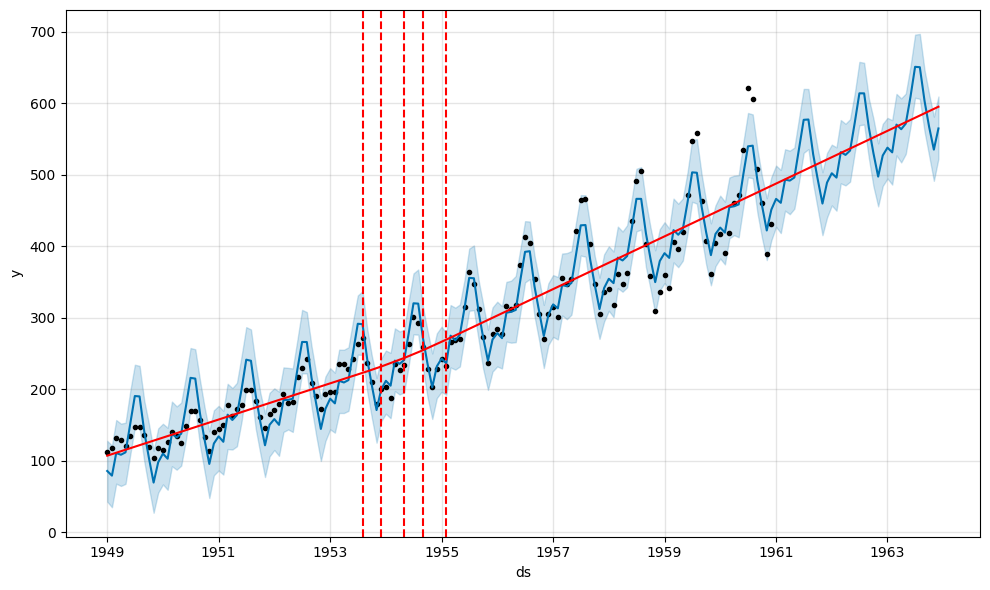

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

We can view the dates where the chagepoints occurred.

In [ ]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

- We can change the inferred changepoint range by setting the `changepoint_range`

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/qfv3iwm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/aq_nbwev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54772', 'data', 'file=/tmp/tmpwnane455/qfv3iwm4.json', 'init=/tmp/tmpwnane455/aq_nbwev.json', 'output', 'file=/tmp/tmpwnane455/prophet_modelfvqny289/prophet_model-20240308155934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


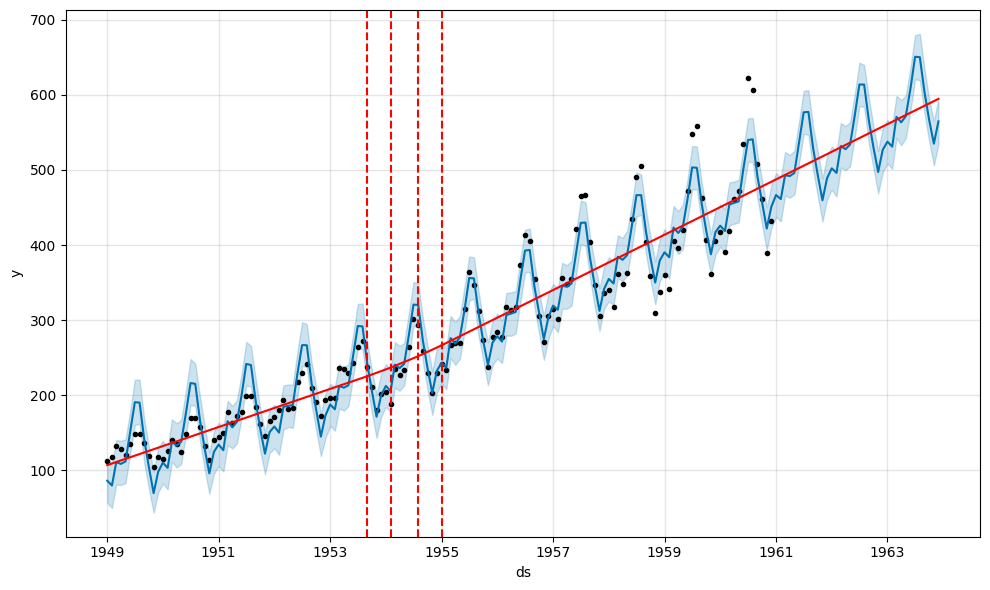

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

The number of changepoints can be set by using the `n_changepoints` parameter when initializing prophet.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/nuybx1oo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnane455/pyr5bd3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14937', 'data', 'file=/tmp/tmpwnane455/nuybx1oo.json', 'init=/tmp/tmpwnane455/pyr5bd3k.json', 'output', 'file=/tmp/tmpwnane455/prophet_modeltvdup75o/prophet_model-20240308155935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


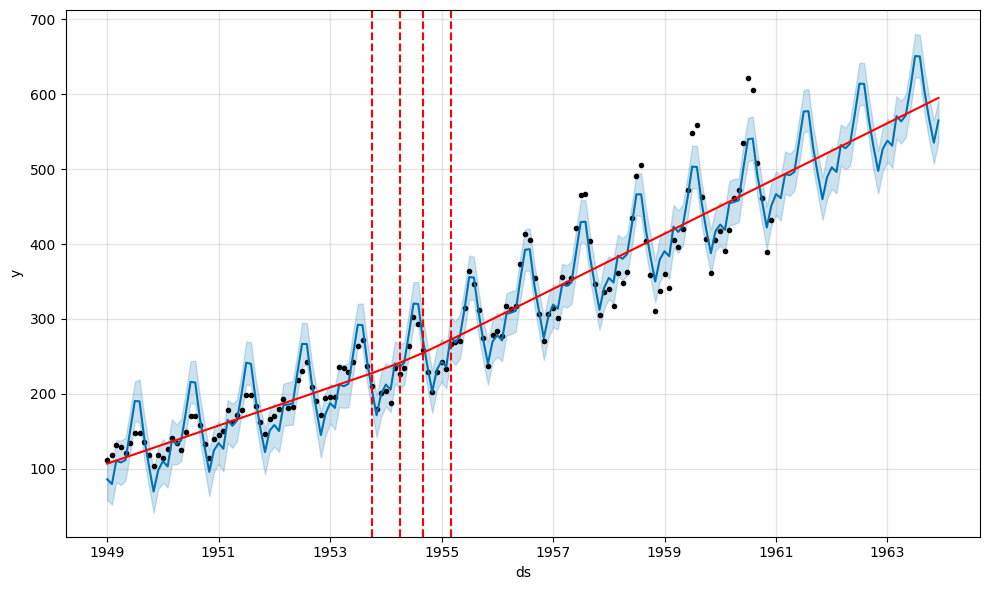

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

### Adjusting Trend

- Prophet allows us to adjust the trend in case there is an overfit or underfit.

- `changepoint_prior_scale` helps adjust the strength of the trend.

- Default value for `changepoint_prior_scale` is 0.05.

- Decrease the value to make the trend less flexible.

- Increase the value of `changepoint_prior_scale` to make the trend more flexible.

- Increasing the `changepoint_prior_scale` to 0.08 to make the trend flexible.

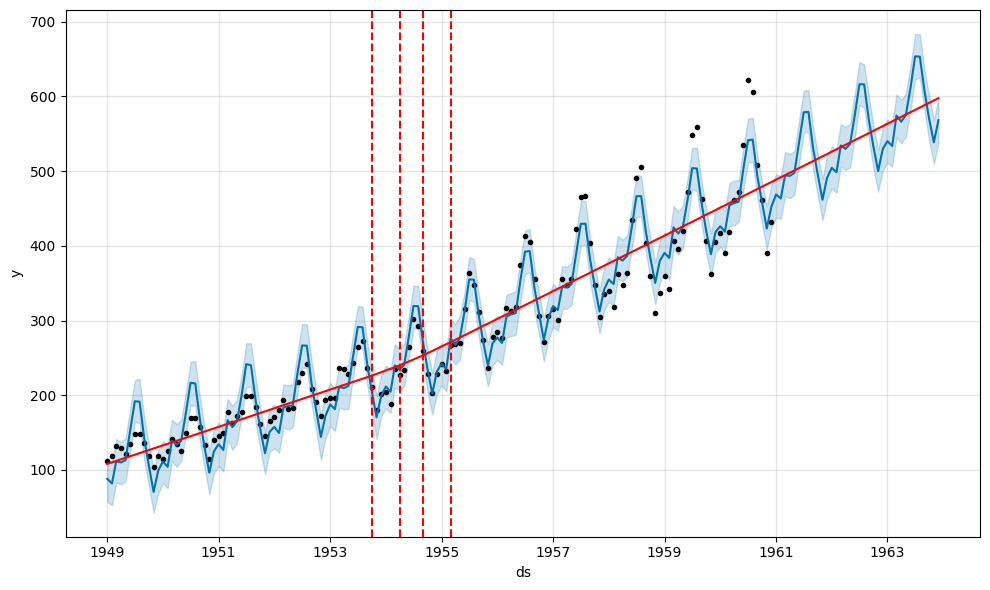

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

- Decreasing the `changepoint_prior_scale` to 0.001 to make the trend less flexible.

16:43:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


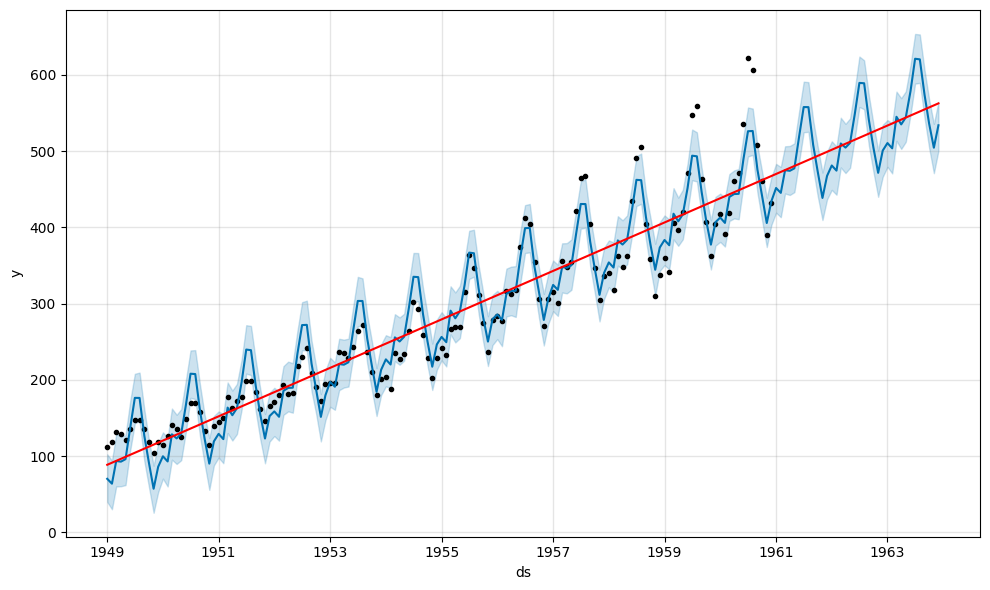

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)